In [1]:
import numpy as np
import processi_EMGIT as em
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
#23400 realized volatilities
s=em.gbm_expOU(100,1,23400)
r2=em.calcolaRendimenti(s[0],len(s[0]))
f=em.realVol(r2,1,23400) #sotto i 5 minuti per vedere errore di microstruttura
diff=np.zeros(len(f))
for i in range(len(f)):
    diff[i]=(s[1][i]-f[i])

In [3]:
#78 realized volatilities
s=em.gbm_expOU(100,1,23400)
r2=em.calcolaRendimenti(s[0],len(s[0]))
rv=em.realVol(r2,300,23400) #a 5 minuti per non vederlo
d=np.zeros(len(rv))
for (i,j) in zip(range(0,len(s[0]),300),range(len(rv))):
    d[j]=(s[1][i]-rv[j])


<Figure size 1440x720 with 0 Axes>

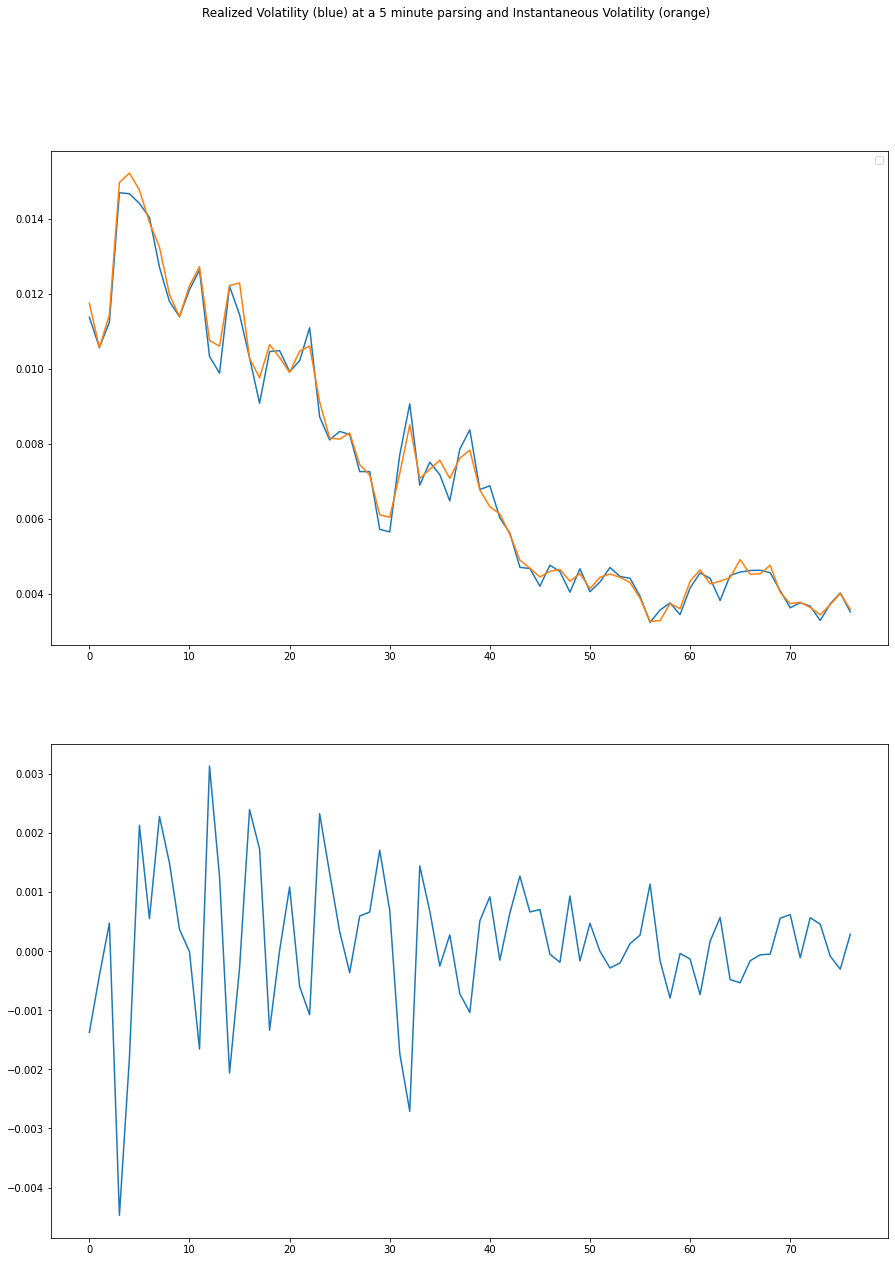

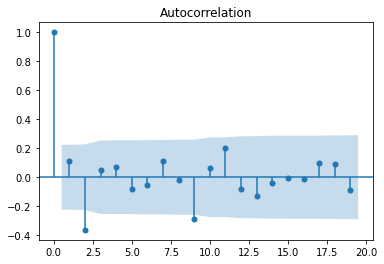

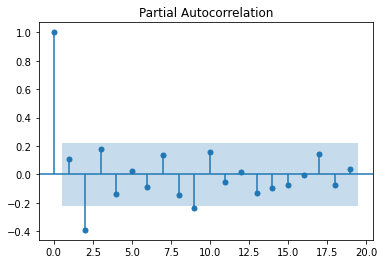

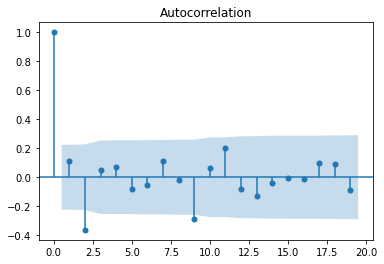

In [4]:
#78 realized volatilities
xx=[x for x in range(len(rv))]
z=s[1].reshape(-1,300).mean(axis=1)

plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(2,figsize=(15,20))
fig.suptitle('Realized Volatility (blue) at a 5 minute parsing and Instantaneous Volatility (orange)')
#fig.inftitle("Differences: RV-sigma")
axs[0].legend("fff")
axs[0].plot(xx, rv,xx, z[1:])
axs[1].plot(d,label="differences")
plt.show()
plot_pacf(d)
plot_acf(d)

In [5]:
f.mean()
s[1].mean()

0.007303011302445766

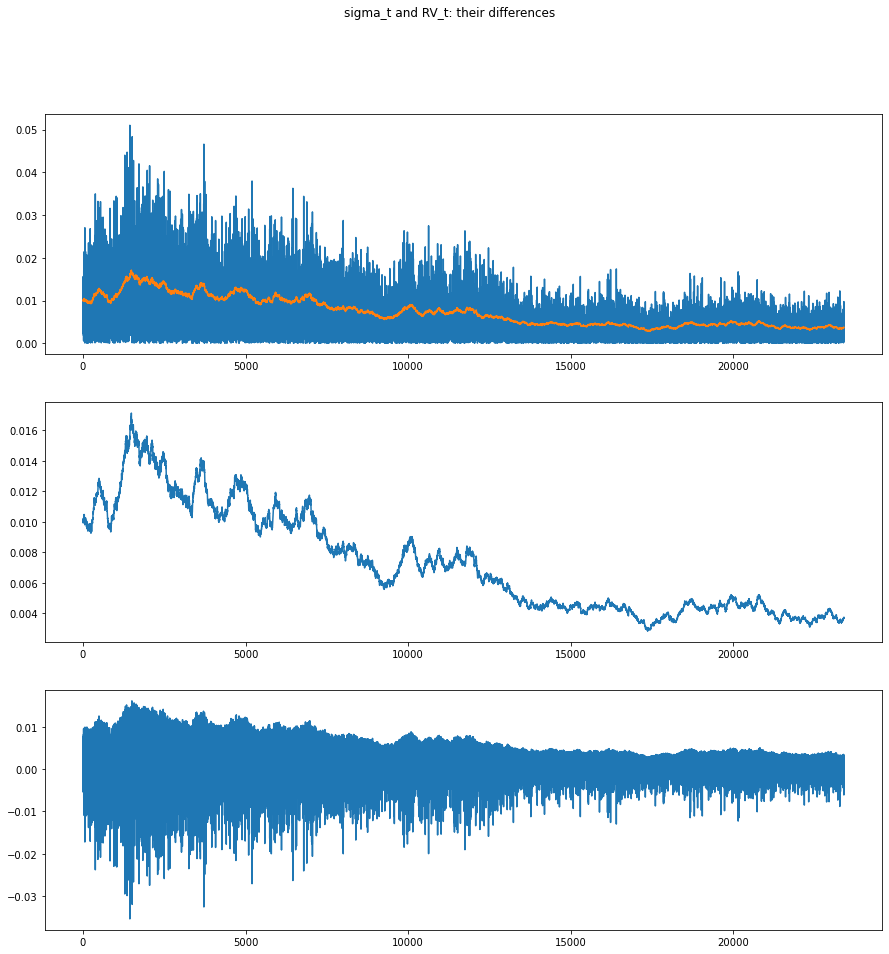

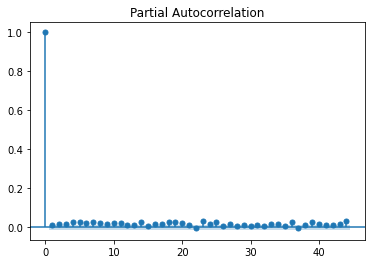

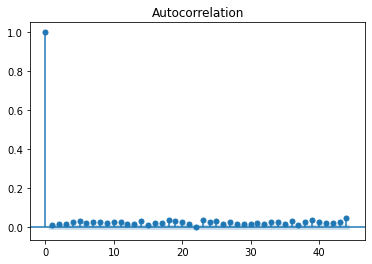

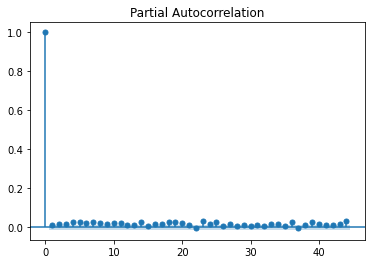

In [9]:
#23400 realized volatilities
xx=[x for x in range(len(f))]
z=s[1].reshape(-1,10).mean(axis=1)
fig, axs = plt.subplots(3,figsize=(15,15))
fig.suptitle('sigma_t and RV_t: their differences')
axs[0].plot(xx,f,xx,s[1][:-1])
axs[1].plot(s[1])
axs[2].plot(diff)

plt.show()
plot_acf(diff)
plot_pacf(diff)